In [109]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [111]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [114]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [116]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [118]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with= engine)

In [120]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [122]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [124]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [127]:
#total dates
session.query(func.count(measurement.date)).all()

[(19550,)]

In [129]:
# Find the most recent date in the data set. 

#session.query(dow.date).orderby(dow.date).first

earliest = session.query(measurement.date).order_by(measurement.date).first()
latest = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"earliest: {earliest} , latest: {latest}")


earliest: ('2010-01-01',) , latest: ('2017-08-23',)


In [131]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
latestdate = dt.datetime.strptime(latest[0], '%Y-%m-%d')

In [133]:
date = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
date

datetime.date(2016, 8, 23)

In [140]:
sel = [measurement.date,measurement.prcp]
results = session.query(*sel).filter(measurement.date >= date).all()

In [144]:
precipitation = pd.DataFrame(results, columns=['Date','Precipitation'])
precipitation.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [150]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = precipitation.describe
summary()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


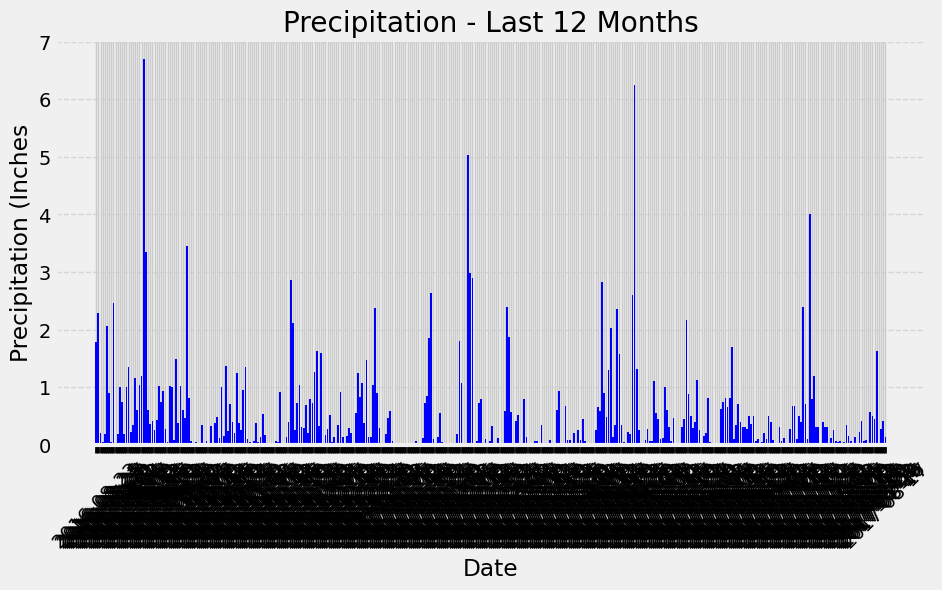

In [162]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 5))
plt.bar(precipitation['Date'], precipitation['Precipitation'], color='blue')

plt.xlabel('Date')
plt.ylabel('Precipitation (Inches') 
plt.title('Precipitation - Last 12 Months')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Exploratory Station Analysis

In [166]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count() 

9

In [168]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station,func.count(measurement.id)]
most_active_stations = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [177]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
mostactivestation = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
mostactivestation

(54.0, 85.0, 71.66378066378067)

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [20]:
# Close Session
session.close()